In [1]:
from load_data import *
from feature_creation import *
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from model_predictions import *
from explanation import *

In [2]:
consTrain, acctTrain, inflowsTrain, outflowsTrain = load_training_data()
XTrain, yTrain, cat_percent_model, cat_income_model = create_features(consTrain, acctTrain, inflowsTrain, outflowsTrain)

In [3]:
best_thresh = evaluate_features(XTrain,yTrain)

Best Threshold=0.00939026, Best AUC=0.863, Best Accuracy=83.71%


In [4]:
selection_model, selection = train_model(XTrain,yTrain, best_thresh)

 n=45, Accuracy: 83.32% , AUC: 0.671
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       798
           1       0.58      0.41      0.48       185

    accuracy                           0.83       983
   macro avg       0.73      0.67      0.69       983
weighted avg       0.82      0.83      0.82       983



In [5]:
consTest, acctTest, inflowsTest, outflowsTest = load_holdout_data()

In [7]:
XTest = create_features(consTest, acctTest, inflowsTest, outflowsTest, False, cat_percent_model, cat_income_model)

In [8]:
predictions, reasons = run_model(selection_model , selection, XTest)

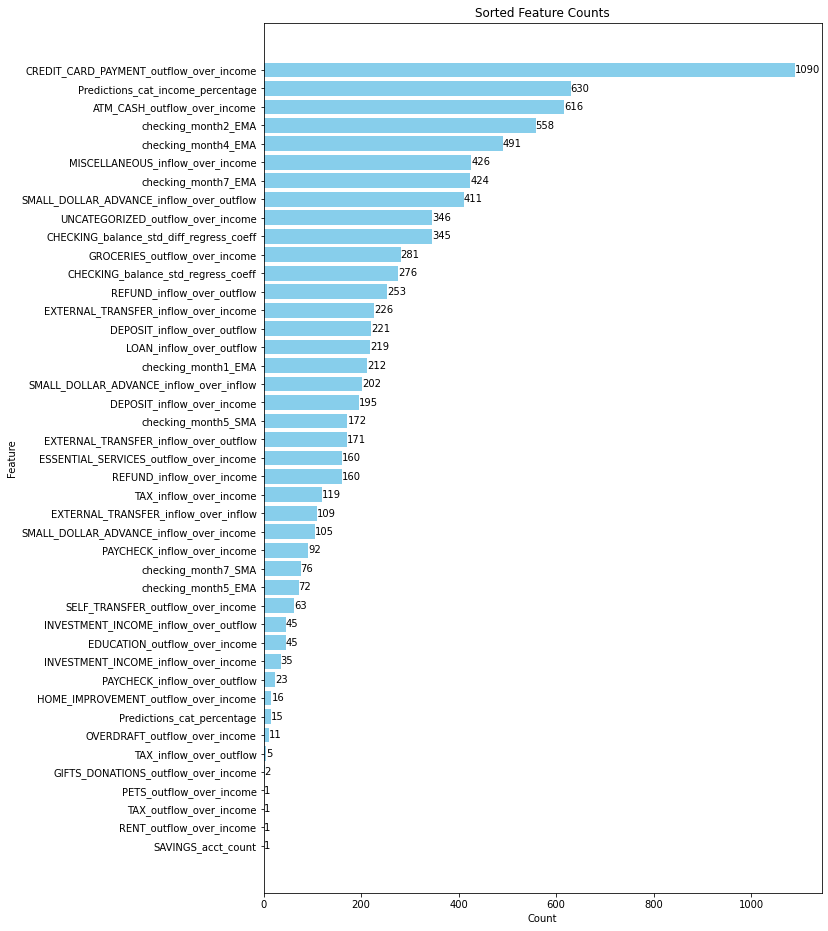

In [9]:
explanation(reasons)

In [9]:
# from collections import Counter
# features = [j[0] for r in reason for j in r]
# feature_counts = Counter(features)

In [10]:
# # Sort features by their counts
# sorted_features = sorted(feature_counts.items(), key=lambda x: x[1])
# sorted_feature_names = [feature[0] for feature in sorted_features]
# sorted_feature_counts = [feature[1] for feature in sorted_features]

# # Plot the sorted value counts
# plt.figure(figsize=(10, 16))
# plt.barh(sorted_feature_names, sorted_feature_counts, color='skyblue')
# plt.xlabel('Count')
# plt.ylabel('Feature')
# plt.title('Sorted Feature Counts')

# for i, count in enumerate(sorted_feature_counts):
#     plt.text(count, i, str(count), ha='left', va='center', color='black')

# plt.savefig('most_common_reasons.png', bbox_inches='tight')
# plt.show()